# CSC3831 Final Assessment - Part I: Data Engineering



In [ ]:
# Loading in standard packages for analysis, feel free to add an extra packages you'd like to use here
import random
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.neighbors import LocalOutlierFactor
# Loading in the corrupted dataset to be used in analysis and imputation
houses_corrupted = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.1_MAR.csv', header=0)
# Remove an artifact from the dataset
houses_corrupted.drop(["Unnamed: 0"], axis=1, inplace=True)

Above we've loaded in a corrupted version of a housing dataset. The anomalies need to be dealt with and missing values imputed.

### 1. Data Understanding [7]
- Perform ad hoc EDA to understand and describe what you see in the raw dataset
  - Include graphs, statistics, and written descritpions as appropriate
  - Any extra information about the data you can provide here is useful, think about performing an analysis (ED**A**), what would you find interesting or useful?
- Identify features with missing records, outlier records


In [ ]:
houses_corrupted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_house_value  20640 non-null  float64
 1   median_income       18576 non-null  float64
 2   housing_median_age  18576 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          18576 non-null  float64
 6   households          20640 non-null  float64
 7   latitude            20640 non-null  float64
 8   longitude           20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
houses_corrupted.describe()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
count,20640.000000,18576.000000,18576.000000,20640.000000,20640.000000,18576.000000,20640.000000,20640.000000,20640.000000
mean,206855.816909,3.929958,28.324182,2635.763081,537.898014,1488.069283,499.539680,35.631861,-119.569704
std,115395.615874,1.964296,12.584914,2181.615252,421.247906,1170.585810,382.329753,2.135952,2.003532
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000
25%,119600.000000,2.560300,18.000000,1447.750000,295.000000,839.000000,280.000000,33.930000,-121.800000
50%,179700.000000,3.572400,28.000000,2127.000000,435.000000,1227.000000,409.000000,34.260000,-118.490000
75%,264725.000000,4.870050,37.000000,3148.000000,647.000000,1803.000000,605.000000,37.710000,-118.010000
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000


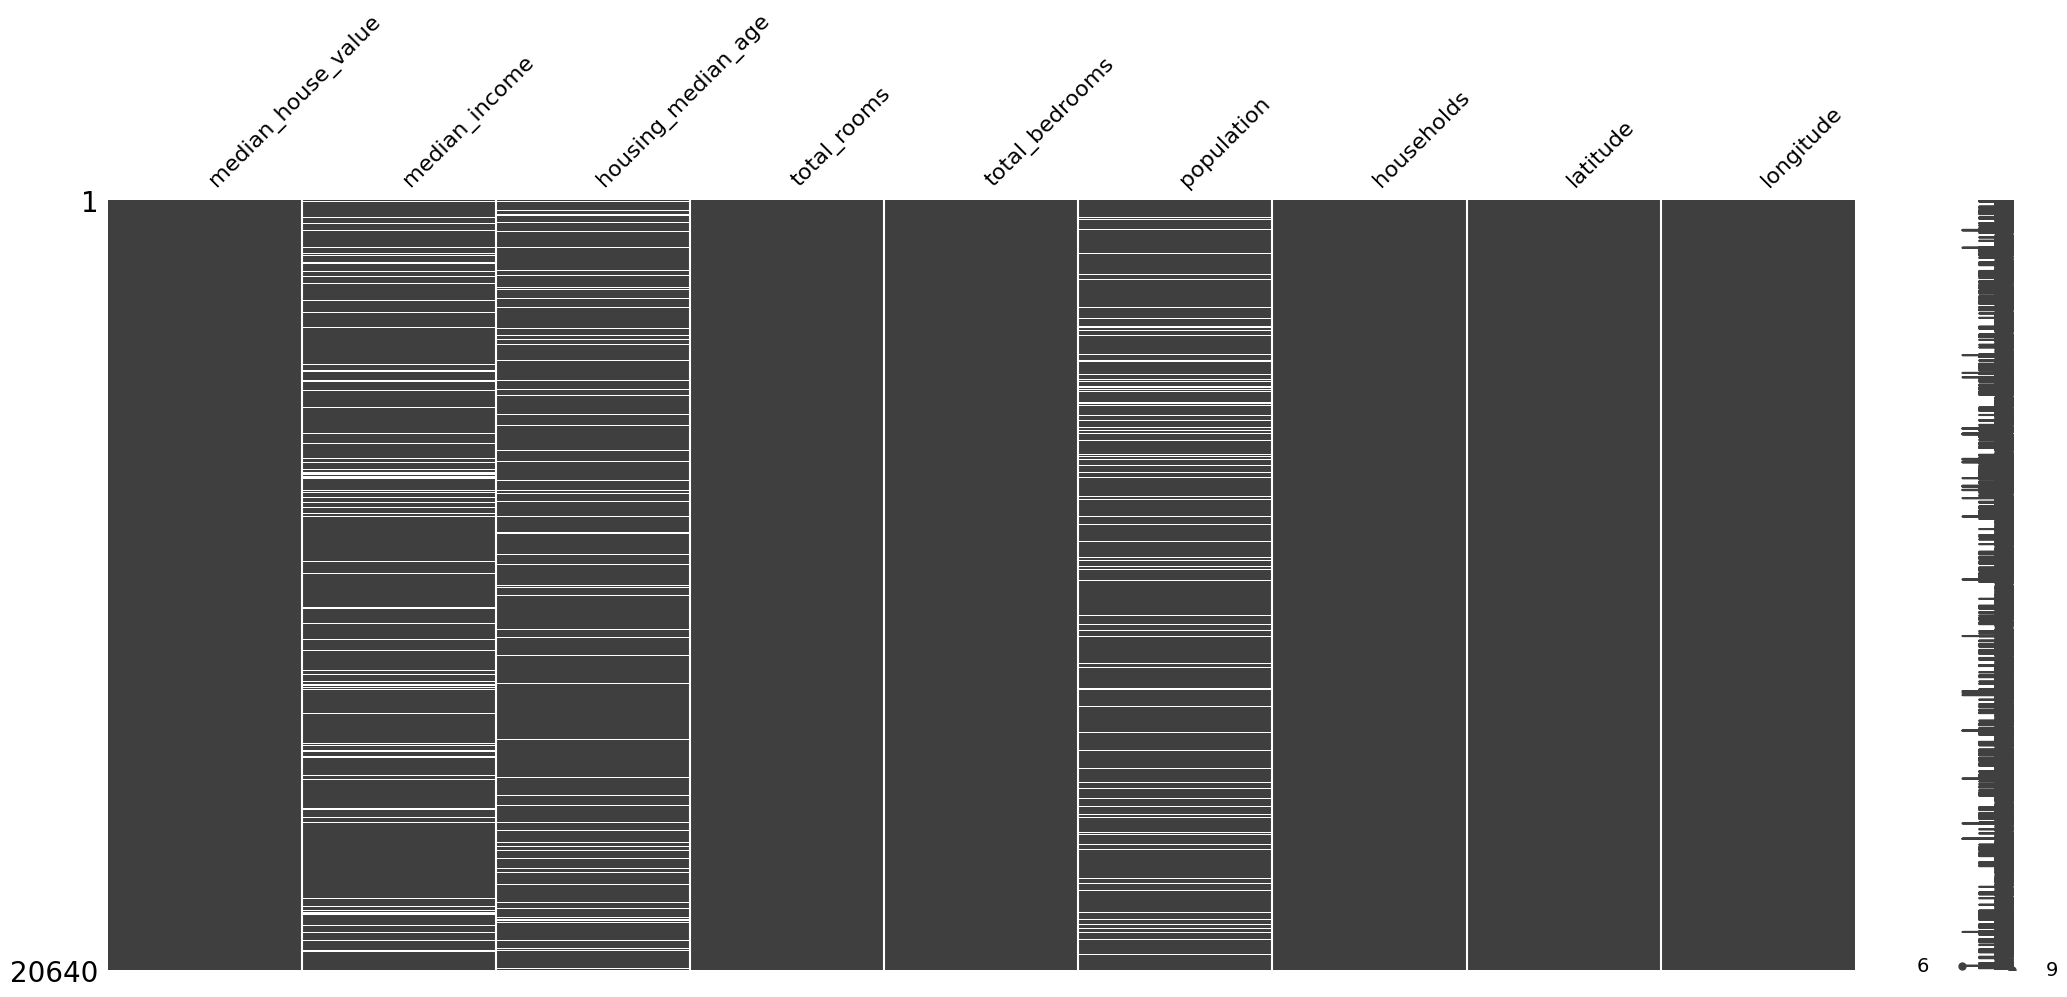

In [ ]:
# Visualize missing data
msno.matrix(houses_corrupted)
plt.show()

In [ ]:
# Count missing values per feature
missing_data = houses_corrupted.isnull().sum().sort_values(ascending=False)/len(houses_corrupted)*100
print(missing_data)

median_income         10.0
housing_median_age    10.0
population            10.0
median_house_value     0.0
total_rooms            0.0
total_bedrooms         0.0
households             0.0
latitude               0.0
longitude              0.0
dtype: float64


The missing data graph showcases the lost or incorrect data in the median_income, housing_median_age, and population sections. Each of them are missing 10% of their records.

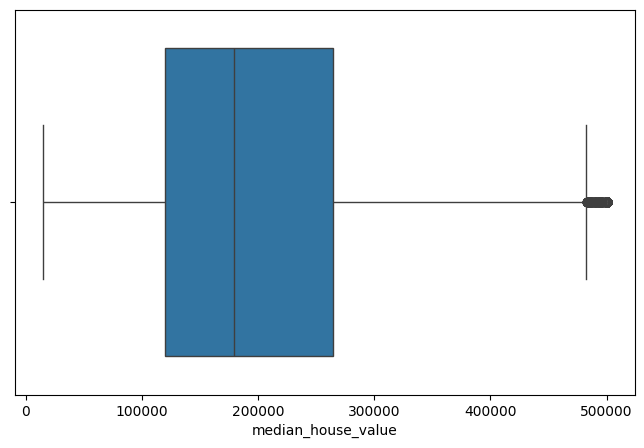

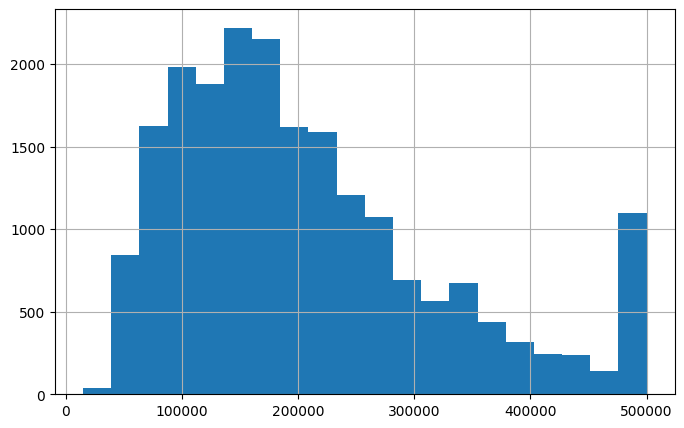

In [ ]:
# Boxplots to visualize potential outliers
plt.figure(figsize=(8, 5))
sns.boxplot(data=houses_corrupted['median_house_value'], orient="h")
plt.show()

# Histograms of numerical features
houses_corrupted['median_house_value'].hist(bins=20, figsize=(8, 5))
plt.show()

Median_house_value is positively skewed.
There are outliers compacted around $500,000. This is probably due to the peak, indicating a posible bimodal distribution.

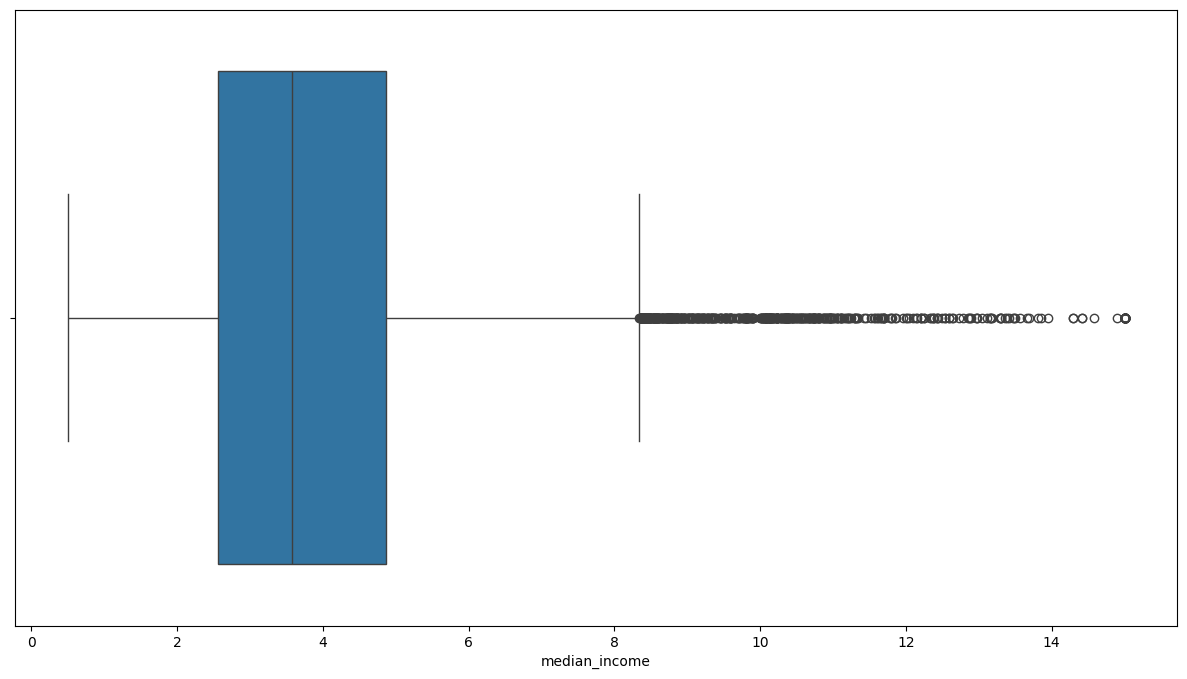

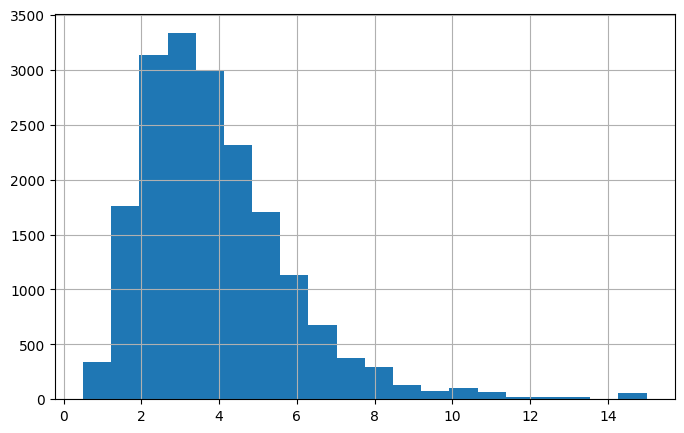

In [ ]:
# Boxplots to visualize potential outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=houses_corrupted['median_income'], orient="h")
plt.show()

# Histograms of numerical features
houses_corrupted['median_income'].hist(bins=20, figsize=(8, 5))
plt.show()

Medium_income is positively skewed.
There is a large number of outliers ranging from 8 to over 14. These are all apart of the right-skewed distrubution tail.

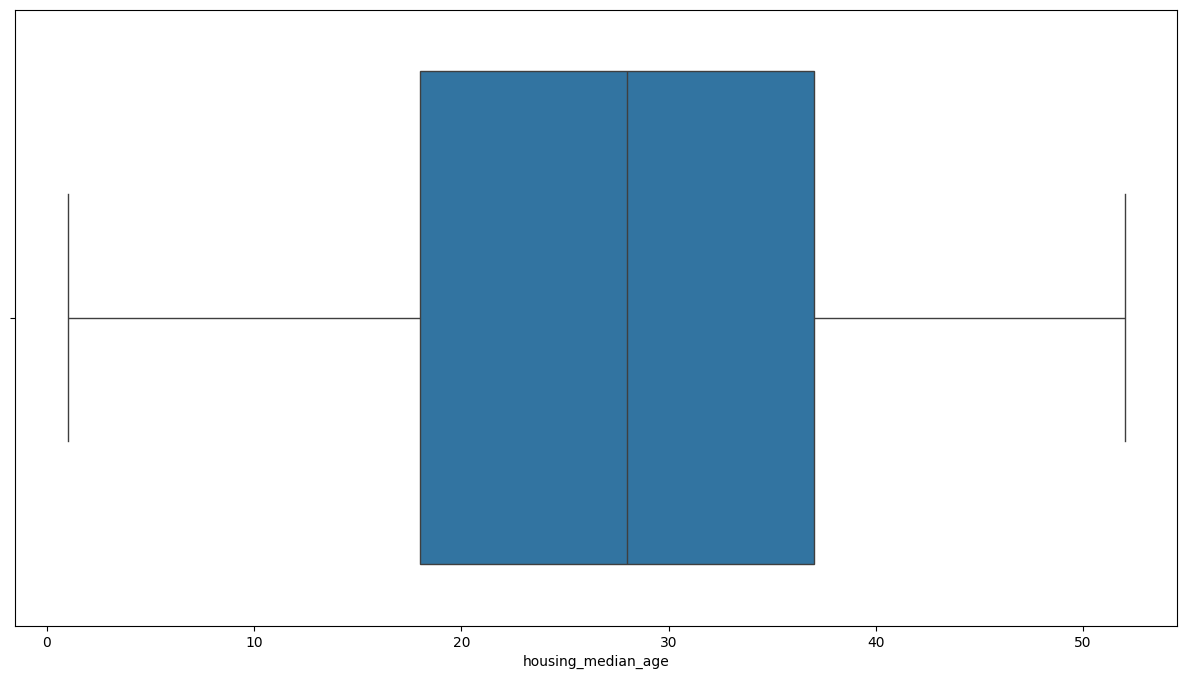

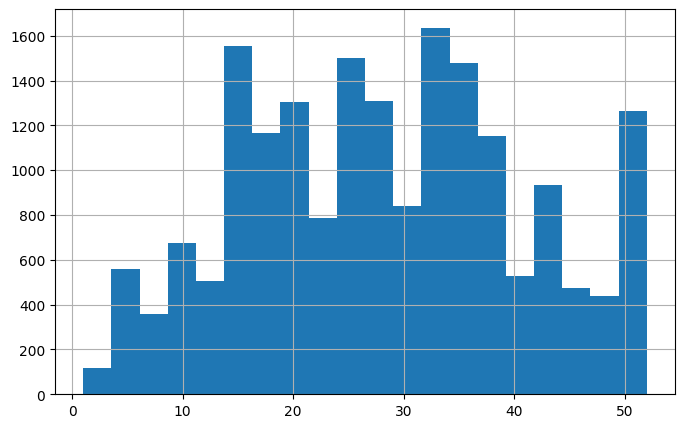

In [ ]:

# Boxplots to visualize potential outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=houses_corrupted['housing_median_age'], orient="h")
plt.show()

# Histograms of numerical features
houses_corrupted['housing_median_age'].hist(bins=20, figsize=(8, 5))
plt.show()

Housing_median_age appears negatively skewed, although nearly at a normal distribution.
There are no outliers.
It appears to be a uniform distrution.

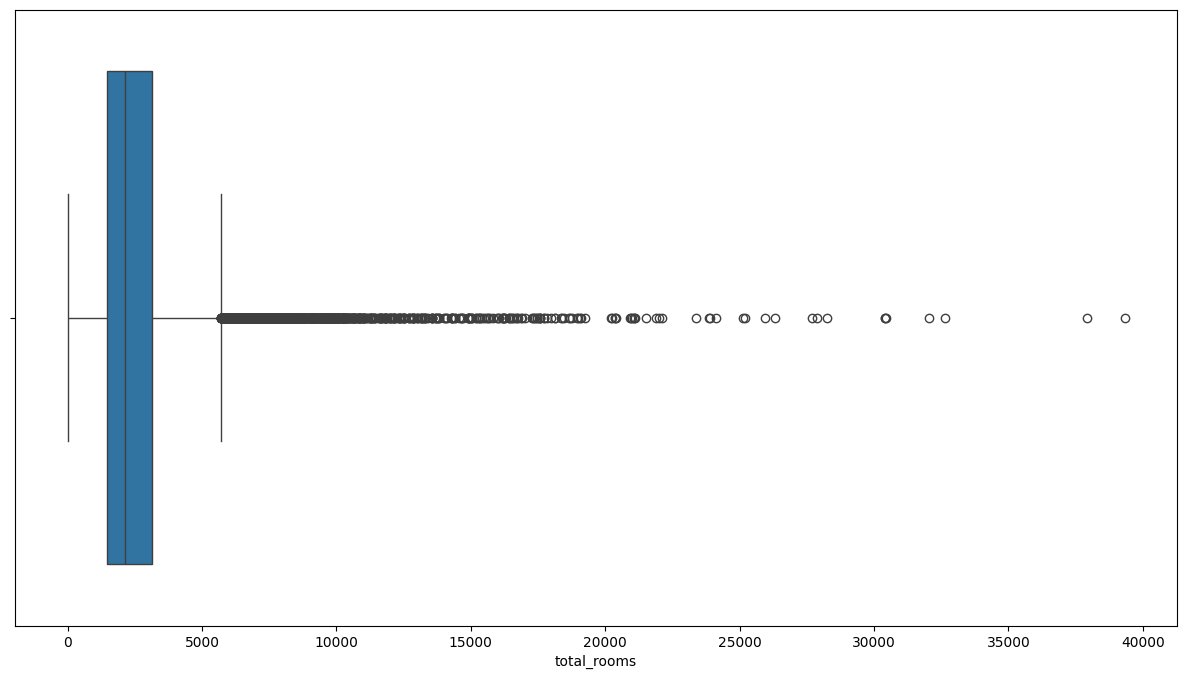

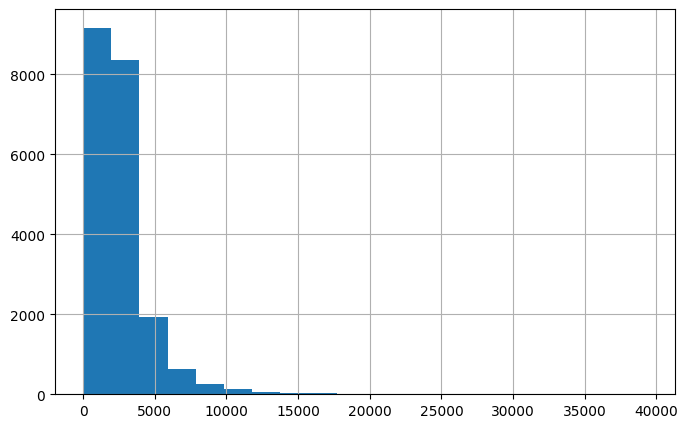

In [ ]:
# Boxplots to visualize potential outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=houses_corrupted['total_rooms'], orient="h")
plt.show()

# Histograms of numerical features
houses_corrupted['total_rooms'].hist(bins=20, figsize=(8, 5))
plt.show()

Total_rooms is positively skewed.
There is a large percentage of outliers ranging from 5,000 to 40,000 rooms.
The histogram shows this to be right-skewed with a long, albiet minimal, tail.


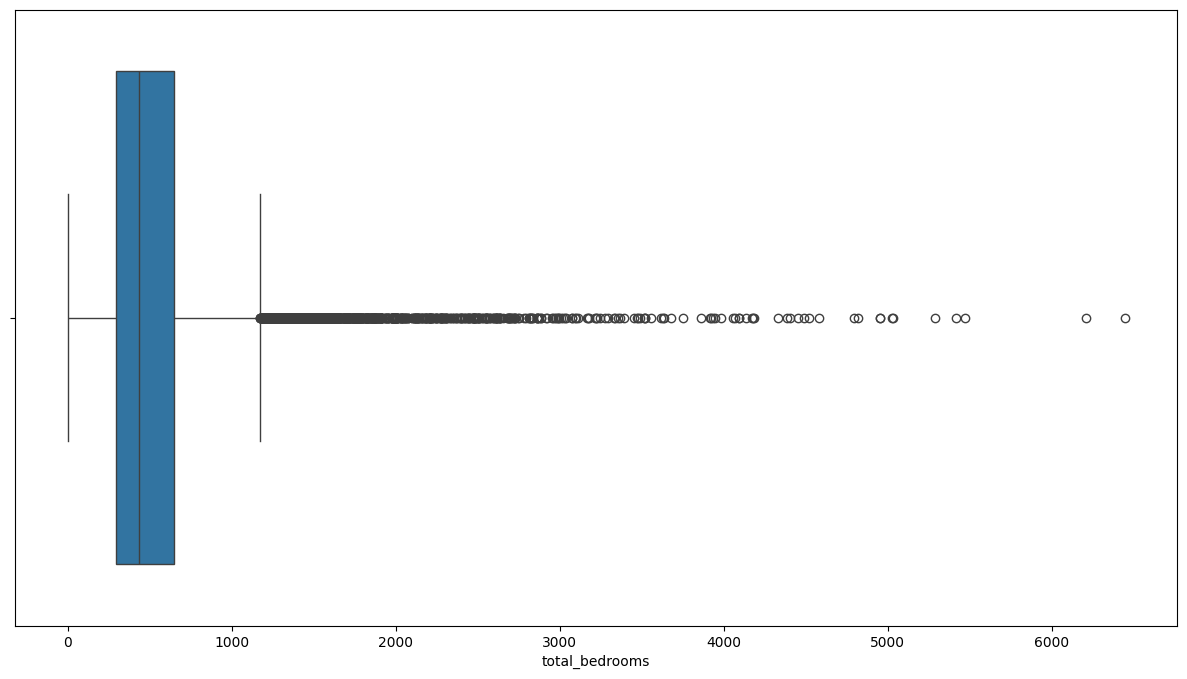

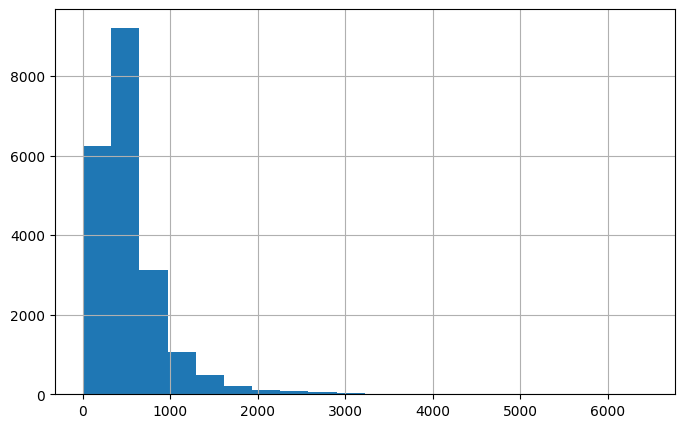

In [ ]:
# Boxplots to visualize potential outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=houses_corrupted['total_bedrooms'], orient="h")
plt.show()

# Histograms of numerical features
houses_corrupted['total_bedrooms'].hist(bins=20, figsize=(8, 5))
plt.show()

Total_bedrooms is positively skewed.
There is a large number of outliers ranging from over 1,000 to over 6,000.
I belive there is a direct linkage between this and total_rooms.

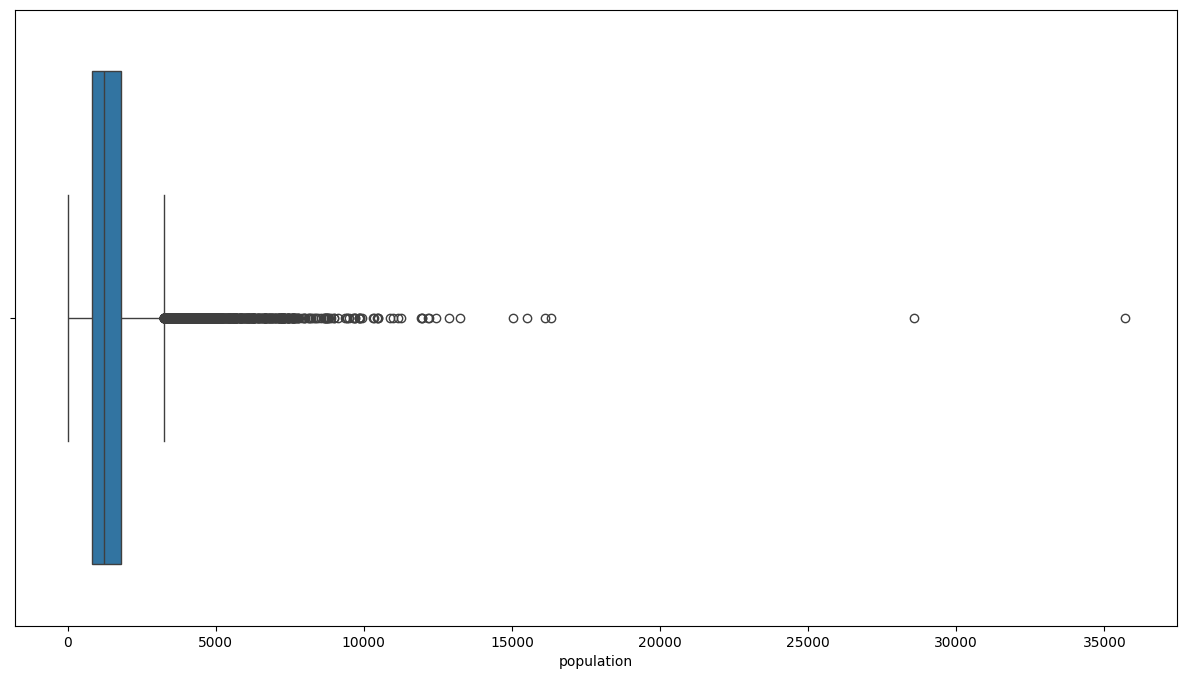

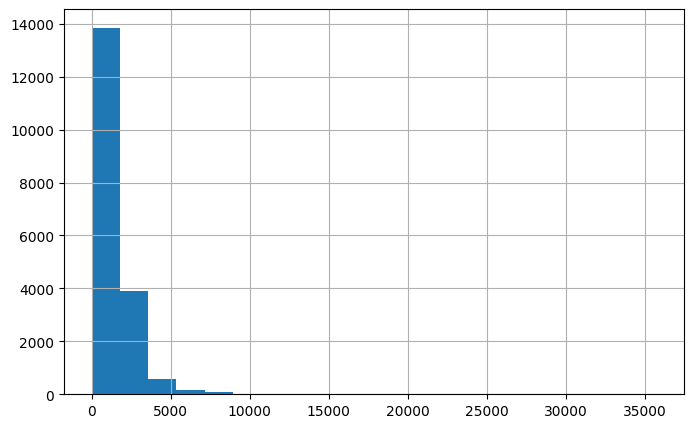

In [ ]:
# Boxplots to visualize potential outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=houses_corrupted['population'], orient="h")
plt.show()

# Histograms of numerical features
houses_corrupted['population'].hist(bins=20, figsize=(8, 5))
plt.show()

Population is positively skewed. There is a large number of outliers ranging from under 5,000 to a little over 35,000.

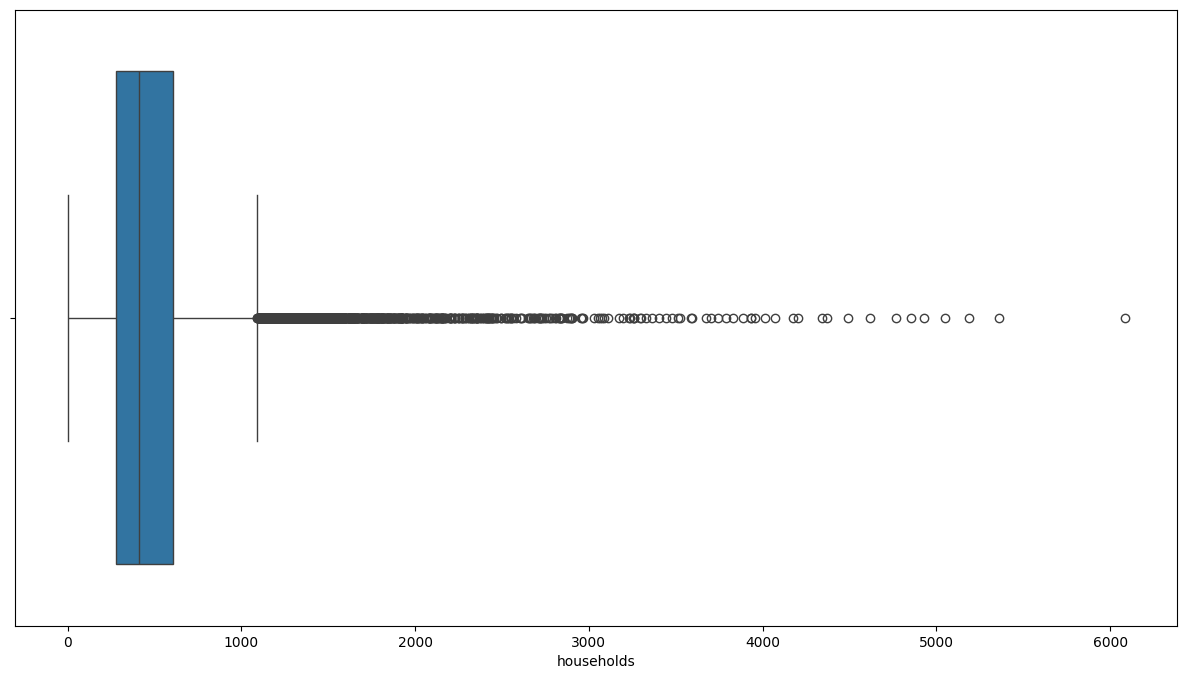

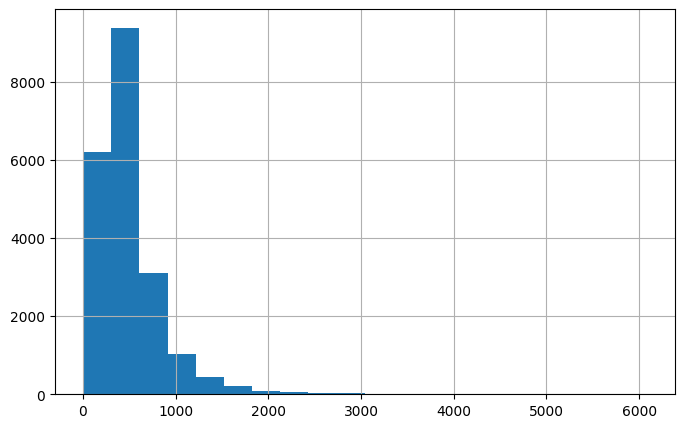

In [ ]:
# Boxplots to visualize potential outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=houses_corrupted['households'], orient="h")
plt.show()

# Histograms of numerical features
houses_corrupted['households'].hist(bins=20, figsize=(8, 5))
plt.show()

Households is positively skewed.
There are a large number of outliers ranging from a little over 1,000 to 6,000.

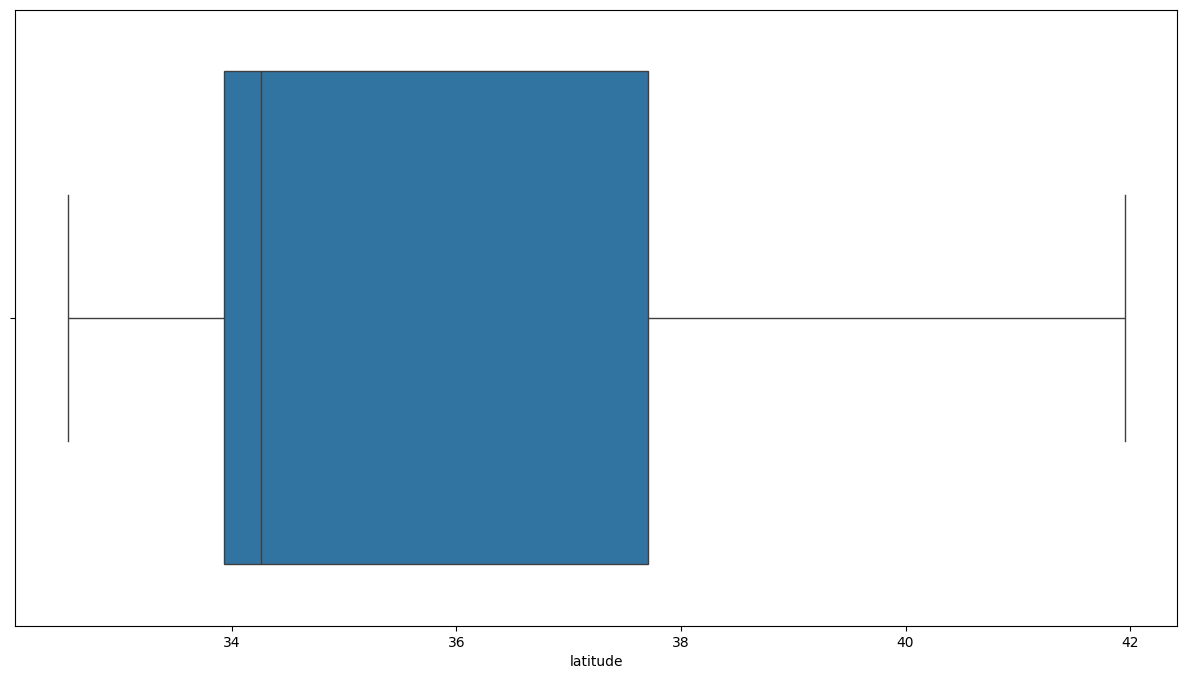

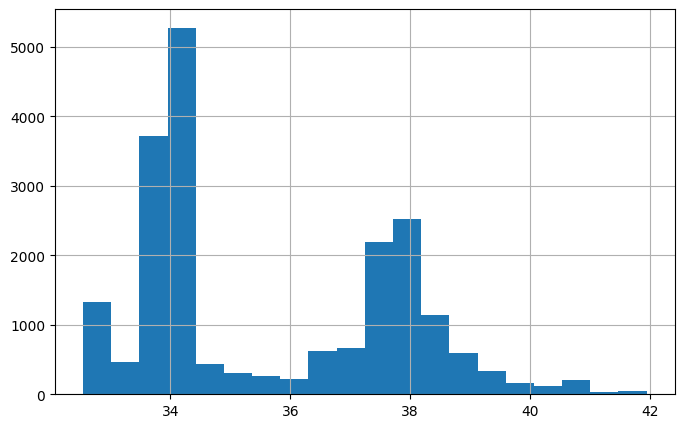

In [ ]:
# Boxplots to visualize potential outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=houses_corrupted['latitude'], orient="h")
plt.show()

# Histograms of numerical features
houses_corrupted['latitude'].hist(bins=20, figsize=(8, 5))
plt.show()

latitude is very positively skewed.
There are absolutely no outliers.

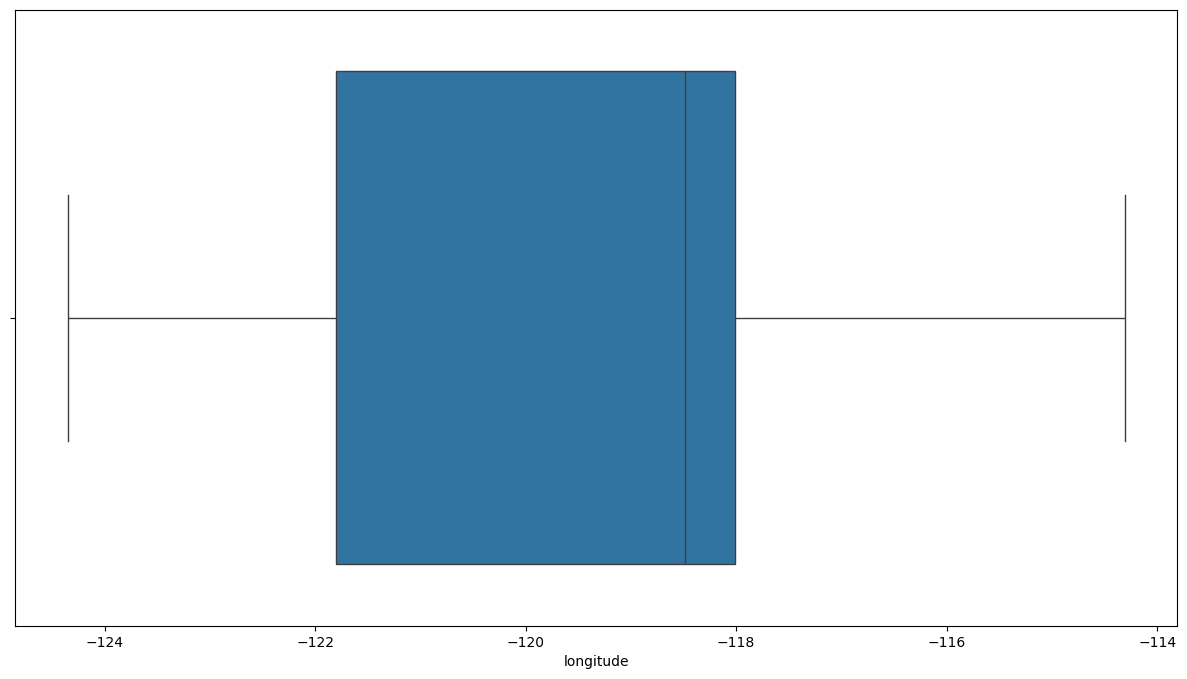

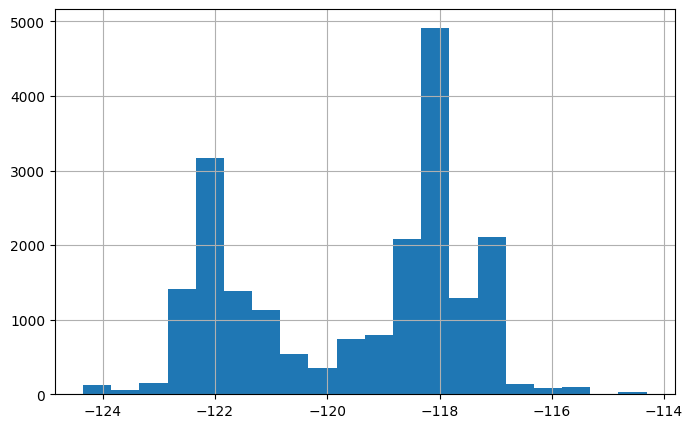

In [ ]:
# Boxplots to visualize potential outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=houses_corrupted['longitude'], orient="h")
plt.show()

# Histograms of numerical features
houses_corrupted['longitude'].hist(bins=20, figsize=(8, 5))
plt.show()

Longitude is very negatively skewed.
There are no outliers at all.
The histogram is uniformally skewed.

### 2. Outlier Identification [10]
- Utilise a statistical outlier detection approach (i.e., **no** KNN, LOF, 1Class SVM)
- Utilise an algorithmic outlier detection method of your choice
- Compare results and decide what to do with identified outleirs
  - Include graphs, statistics, and written descriptions as appropriate
- Explain what you are doing, and why your analysis is appropriate
- Comment on benefits/detriments of statistical and algorithmic outlier detection approaches


In [ ]:
import numpy as np
import pandas as pd

# Assuming 'houses_corrupted' is loaded and missing values are handled

anomalies = {}  # Dictionary to store anomaly details
# Drop 'latitude' and 'longitude' before the loop
for column in houses_corrupted.drop(columns=["latitude", "longitude"]):
    median = houses_corrupted[column].median()
    mad = 1.4826 * np.fabs(houses_corrupted[column] - median).median()  # Corrected constant

    # Calculate robust Z-scores for the whole column
    rob_z_scores = (houses_corrupted[column] - median) / mad

    # Find indices where robust Z-score > 3
    anomaly_indices = rob_z_scores[rob_z_scores.abs() > 3].index.tolist()

    # Record the anomalies
    if anomaly_indices:
        anomalies[column] = houses_corrupted.loc[anomaly_indices]

# Output the total count of anomalies and specific rows with anomalies
print(f"Total Anomalies: {sum(len(v) for v in anomalies.values())}")
for col, data in anomalies.items():
    print(f"Anomalies in {col}:")
    print(data)

Total Anomalies: 6527
Anomalies in median_house_value:
       Unnamed: 0  median_house_value  median_income  housing_median_age  \
89             89            500001.0         1.2434                52.0   
459           459            500001.0         1.1696                52.0   
489           489            489600.0         3.0417                48.0   
493           493            500001.0         7.8521                52.0   
494           494            500001.0         9.3959                52.0   
...           ...                 ...            ...                 ...   
20422       20422            500001.0         5.1457                35.0   
20426       20426            500001.0        10.0472                11.0   
20427       20427            500001.0         8.6499                 4.0   
20436       20436            500001.0        12.5420                10.0   
20443       20443            500001.0         3.3438                50.0   

       total_rooms  total_bedroo

Robust z-scores are better for skewed data and, as evidenced by the asset-finding in Part 1, the data can be very skewed.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor

# Handle missing values by median imputation before applying LOF
imputer = SimpleImputer(strategy='median')
houses_imputed = pd.DataFrame(imputer.fit_transform(houses_corrupted), columns=houses_corrupted.columns)

# Apply LOF for outlier detection
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_predictions = lof.fit_predict(houses_imputed)

# Get indices of rows identified as outliers by LOF
lof_outlier_indices = set(houses_imputed[lof_predictions == -1].index)

print(f"Total number of outliers detected by Local Outlier Factor: {len(lof_outlier_indices)}")

Total number of outliers detected by Local Outlier Factor: 1032


LoF detected less outliers than the robust Z-score. By looking at the histogram graphs, we can see there are many humps, signifying different densities.

In [ ]:
# Find overlap and differences between outlier detection methods
common_outliers = robust_outlier_indices.intersection(lof_outlier_indices)
robust_only_outliers = robust_outlier_indices - lof_outlier_indices
lof_only_outliers = lof_outlier_indices - robust_outlier_indices

print(f"Number of common outliers detected by both methods: {len(common_outliers)}")
print(f"Number of outliers detected only by Robust Z-score: {len(robust_only_outliers)}")
print(f"Number of outliers detected only by LOF: {len(lof_only_outliers)}")

Number of common outliers detected by both methods: 889
Number of outliers detected only by Robust Z-score: 2755
Number of outliers detected only by LOF: 143


The common outliers are likely very significant anomolies that should be removed. Robust z-score outliers might be globally extreme but not locally isolated. Local Outlier Factor outliers could be locally strange but not globally extreme.

By removing common outliers, we are able to create a safer, more precise database without anomalies. By balancing both Statistical Outlier Detection (Robust Z-Score) and Algorithmic Outlier Detection (Local Outlier Factor), we are able to narrow down specific anomalies that, seperately, might actually be crucial for the model.

Pro's/Cans of Robust Z-Score - Pro's: Robust to skewed data, making it ideal for globally extreme outliers. Con's: Cannot detect local anomalies effectively.

Pro's/Con's of Local Outlier Factor - Pro's: Excellent at detecting local anomalies in clustered or complex datasets. Con's: Harder to interpret compared to a straightforward statistical measure and sensitive to hyperparameters such as n_neighbors, which may require careful tuning.

Using both methods together ensures we achieve a thorough understanding of the outliers present, allowing us to make informed decisions on how to handle each detected anomaly to ensure the integrity and quality of our dataset before proceeding to the modeling stage.

### 3. Imputation [10]
- Identify which features should be imputed and which should be removed
  - Provide a written rationale for this decision
- Impute the missing records using KNN imputation
- Impute the missing records using MICE imputation
- Compare both imputed datasets feature distributions against each other and the non-imputed data
- Build a regressor on all thre datasets
  - Use regression models to predict house median price
  - Compare regressors of non-imputed data against imputed datas
  - **Note**: If you're struggling to compare against the original dataset focus on comparing the two imputed datasets against each other


In [ ]:
# Use this dataset for comparison against the imputed datasets
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

In [ ]:
import pandas as pd

# Load the original corrupted dataset (with missing values)
houses_corrupted = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.1_MAR.csv', header=0)

# Drop the artifact column if it exists
houses_corrupted.drop(["Unnamed: 0"], axis=1, inplace=True, errors='ignore')

# Summarize missing values in each feature
missing_counts = houses_corrupted.isnull().sum().sort_values(ascending=False)
total_rows = len(houses_corrupted)

# Determine features to remove or impute based on missing value percentage
removal_threshold = 0.5 * total_rows
features_to_remove = missing_counts[missing_counts > removal_threshold].index.tolist()
features_to_impute = missing_counts[(missing_counts > 0) & (missing_counts <= removal_threshold)].index.tolist()

print(f"Features to be removed due to excessive missing values: {features_to_remove}")
print(f"Features to be imputed: {features_to_impute}")

Features to be removed due to excessive missing values: []
Features to be imputed: ['median_income', 'housing_median_age', 'population']


Removal Threshold: I used 50% as a threshold to decide whether to remove a feature. If more than 50% of the values are missing, there isn't enough information to reliably impute them.

Features to Remove or Impute: Features with fewer missing values are considered suitable for imputation.

In [ ]:
from sklearn.impute import KNNImputer

# Remove features identified for removal
houses_reduced = houses_corrupted.drop(columns=features_to_remove)

# Apply KNN Imputer for imputation
knn_imputer = KNNImputer(n_neighbors=5)
houses_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(houses_reduced), columns=houses_reduced.columns)

print("KNN Imputation completed.")

KNN Imputation completed.


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Apply MICE (Iterative Imputer) for imputation
mice_imputer = IterativeImputer(max_iter=10, random_state=42)
houses_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(houses_reduced), columns=houses_reduced.columns)

print("MICE Imputation completed.")

MICE Imputation completed.


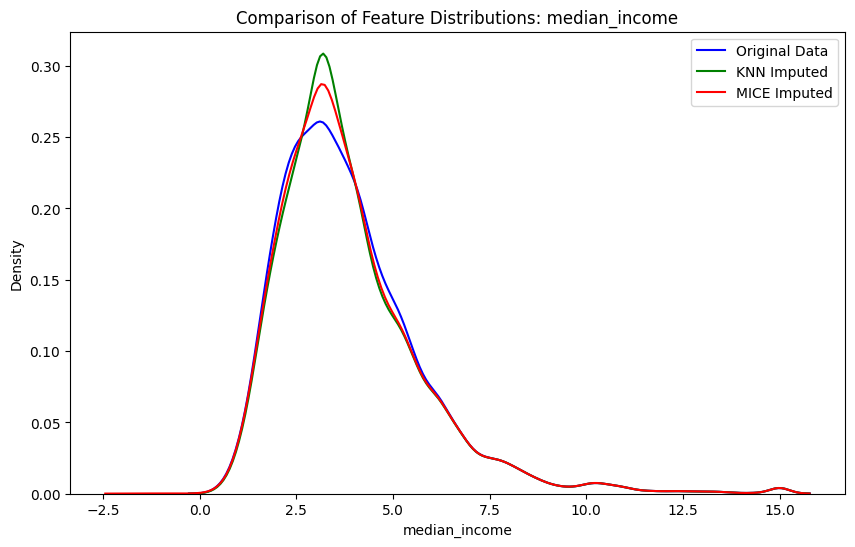

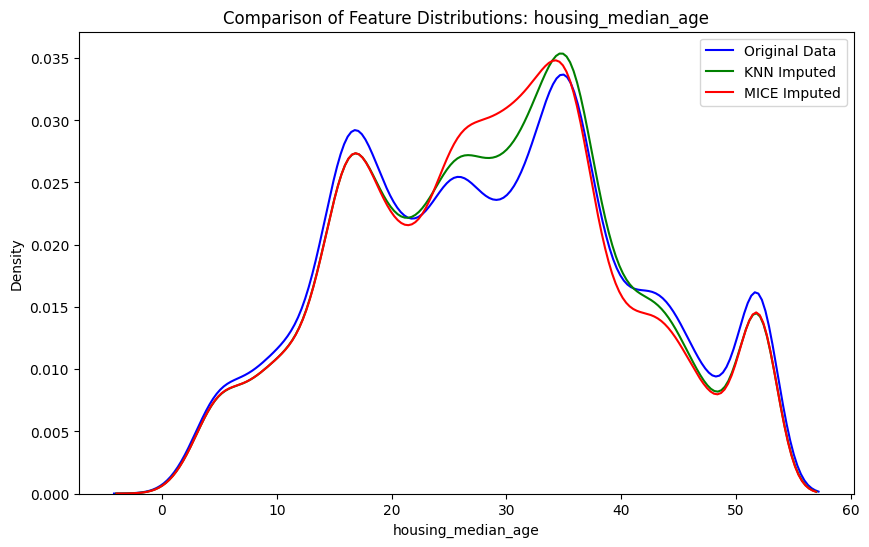

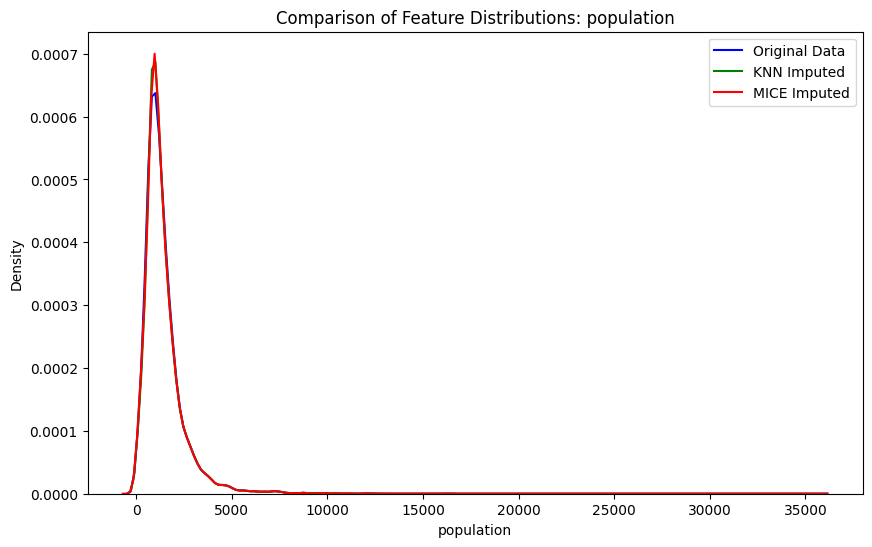

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the original dataset for comparison
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

# Plot distribution comparisons for key features
key_features = ['median_income', 'housing_median_age', 'population']

for feature in key_features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(houses[feature], label='Original Data', color='blue')
    sns.kdeplot(houses_knn_imputed[feature], label='KNN Imputed', color='green')
    sns.kdeplot(houses_mice_imputed[feature], label='MICE Imputed', color='red')
    plt.title(f'Comparison of Feature Distributions: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Define the target and features for each dataset
target = 'median_income'
features = houses.columns.difference([target])

# Split each dataset into train and test sets
X_original = houses[features]
y_original = houses[target]
X_knn = houses_knn_imputed[features]
y_knn = houses_knn_imputed[target]
X_mice = houses_mice_imputed[features]
y_mice = houses_mice_imputed[target]

X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, test_size=0.2, random_state=42)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)
X_train_mice, X_test_mice, y_train_mice, y_test_mice = train_test_split(X_mice, y_mice, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Function to train and evaluate a regression model
def train_and_evaluate(X_train, X_test, y_train, y_test, label):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{label} - Mean Squared Error: {mse:.2f}, R^2 Score: {r2:.2f}")

# Train and evaluate on each dataset
train_and_evaluate(X_train_original, X_test_original, y_train_original, y_test_original, "Original Data (Non-Imputed)")
train_and_evaluate(X_train_knn, X_test_knn, y_train_knn, y_test_knn, "KNN Imputed Data")
train_and_evaluate(X_train_mice, X_test_mice, y_train_mice, y_test_mice, "MICE Imputed Data")

Original Data (Non-Imputed) - Mean Squared Error: 1.27, R^2 Score: 0.64
KNN Imputed Data - Mean Squared Error: 1.27, R^2 Score: 0.63
MICE Imputed Data - Mean Squared Error: 1.21, R^2 Score: 0.66


### 4. Conclusions & Throughts [3]
- Disucss methods used for anomaly detection, pros/cons of each method
- Disucss challenges/difficulties in anomaly detection implementation
- Discuss methods used for imputation, pros/cons of each method
- Discuss challenges/difficulties in imputation implementation

Methods used  for anomaly detection

Robust Z-Score: Pro's - Simple to understand and easy to implement, computationally inexpensive and works well with large datasets, AND it is resistant to the influence of outliers and works effectively on skewed data. Con's - Locally anomalous points may be missed AND it may not perform well in datasets with multiple clusters or complex relationships between features.

Local Outlier Factor: Pro's - It detects points that are isolated within their neighborhood even if they are not globally extreme, making it suitable for datasets with clusters AND it performs well with data that has varied density or multiple clusters.
Con's - It can be computationally expensive, particularly for large datasets, due to neighbor comparisons AND can be sensitive to hyperparameters (finding the best values can require experimentation and tuning).

Anomoly Detection Implementation

Parameter Tuning: Selecting the appropriate value for n_neighbors is challenging, as a small value might lead to overfitting while a large value might ignore subtle anomalies.

Handling Different Types of Outliers: Robust Z-Scores may overlook locally significant outliers. LOF identifies local anomalies but may label some data points incorrectly as outliers if the neighborhood density varies significantly.

Balancing False Positives and False Negatives: Deciding the threshold for outlier detection can affect the balance between false positives and false negatives.

Imputation

K-Nearest Neighbors: Pro's - Uses similar neighboring data points to impute missing values, ensuring that the filled values are likely to be similar to existing ones AND it's straightforward to implement and works well for features that exhibit strong correlations.
Con's - Can be slow, especially for large datasets, AND tends to produce average-like values, which can lead to reduced variability in the dataset.

Multiple Imputation by Chained Equations: Pro's - MICE models each feature as a function of all others AND it produces different imputations each time and averages across them, helping to maintain the natural variability in the dataset. Con's - Computationally expensive due to the iterative modeling of each feature AND it's harder to understand exactly how a specific missing value was imputed.

Challenges of Imputation

Computational Cost: Both KNN and MICE imputations are computationally intensive for large datasets.

Choosing Hyperparameters: For KNN, selecting an appropriate value for n_neighbors impacts how well the imputed values represent local characteristics while MICE requires setting the number of iterations.

Maintaining Consistent Data Relationships: MICE did well at capturing inter-feature relationships but ensuring that the results aligned with the original data distribution required comparing the imputed datasets to the original.

Risk of Over-Imputation: KNN tends to produce values that are smoothed averages, which reduces natural variability while MICE may produce variations that need careful evaluation.